nome: Melryllin Genniani De oliveira Sousa

## DATA FRAME TESTES


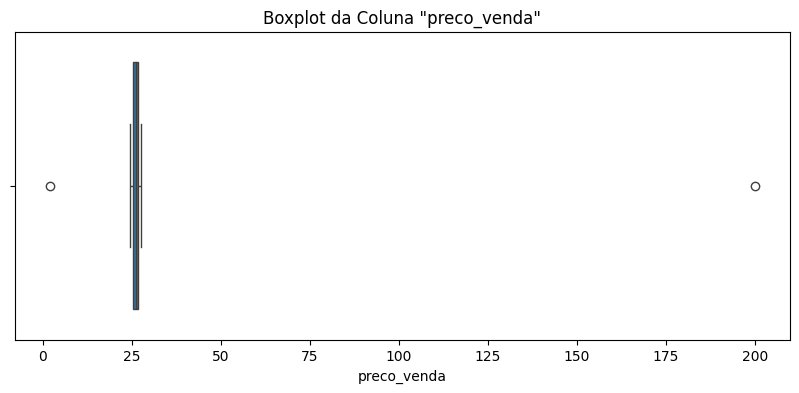

Descrição estatística inicial:
count     20.000000
mean      33.675000
std       39.524821
min        2.100000
25%       25.500000
50%       26.250000
75%       26.925000
max      200.000000
Name: preco_venda, dtype: float64


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CÓDIGO DE DE UM DATAFRAME CRIADO SÓ PARA EXEMPLIFICAR A QUESTÃO 06

dados = {
    'id_produto': range(1, 21),
    'preco_venda': [
        25.5, 26.1, 24.9, 25.8, 26.5, 27.0, 24.5, 26.2, 25.9,
        200.0, # <-- Outlier superior
        26.8, 27.2, 25.1, 26.6, 2.1, # <-- Outlier inferior
        27.5, 26.3, 25.5, 26.9, 27.1
    ]
}

df = pd.DataFrame(dados)

# Visualizando os dados para identificar outliers visualmente
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['preco_venda'])
plt.title('Boxplot da Coluna "preco_venda"')
plt.show()

print("Descrição estatística inicial:")
print(df['preco_venda'].describe())

In [37]:
# CÓDIGO DE DE UM DATAFRAME CRIADO SÓ PARA EXEMPLIFICAR A QUESTÃO 07

# DataFrame 1: Dados de clientes da filial A
df_filial_A = pd.DataFrame({
    'id_cliente': [101, 102, 103],
    'nome': ['Ana', 'Bruno', 'Carlos'],
    'idade': [28, 35, 42]
})

# DataFrame 2: Dados de clientes da filial B (com uma coluna a mais)
df_filial_B = pd.DataFrame({
    'id_cliente': [201, 202, 203],
    'nome': ['Daniela', 'Eduardo', 'Fernanda'],
    'idade': [31, 24, 39],
    'cidade': ['Recife', 'Salvador', 'Natal'] # Coluna que não existe em df_filial_A
})

# DataFrame 3: Dados de compras (colunas diferentes, mas com potencial de alinhamento por índice)
df_compras = pd.DataFrame({
    'id_compra': ['c1', 'c2', 'c3'],
    'produto': ['Celular', 'Notebook', 'Fone'],
    'valor': [2500, 4500, 350]
}, index=[0, 1, 2]) # Índice explícito para alinhar com df_filial_A

print("--- DataFrame Filial A ---")
display(df_filial_A)

print("\n--- DataFrame Filial B ---")
display(df_filial_B)

print("\n--- DataFrame Compras ---")
display(df_compras)

--- DataFrame Filial A ---


,id_cliente,nome,idade
0,101,Ana,28
1,102,Bruno,35
2,103,Carlos,42



--- DataFrame Filial B ---


,id_cliente,nome,idade,cidade
0,201,Daniela,31,Recife
1,202,Eduardo,24,Salvador
2,203,Fernanda,39,Natal



--- DataFrame Compras ---


,id_compra,produto,valor
0,c1,Celular,2500
1,c2,Notebook,4500
2,c3,Fone,350


In [42]:
# CÓDIGO DE DE UM DATAFRAME CRIADO SÓ PARA EXEMPLIFICAR A QUESTÃO 08

# Define o conteúdo do nosso arquivo CSV de exemplo como uma string
# Usamos vírgulas como separador de colunas e '\n' para novas linhas
conteudo_csv = """ID_Produto,Nome_Produto,Categoria,Preco,Estoque
101,Laptop UltraSlim,Eletrônicos,4500.50,15
102,Smartphone X,Eletrônicos,2200.75,30
103,Teclado Mecânico,Acessórios,350.00,50
104,Mouse Gamer,Acessórios,150.99,120
105,Monitor 4K,Eletrônicos,1800.00,20
106,Cadeira Gamer,Móveis,950.60,10
107,Webcam HD,Acessórios,250.00,45
108,SSD 1TB,Componentes,480.25,60
"""

# Cria e escreve o conteúdo no arquivo 'dados_exemplo.csv'
with open('dados_exemplo.csv', 'w', encoding='utf-8') as f:
    f.write(conteudo_csv)

print("Arquivo 'dados_exemplo.csv' foi criado com sucesso!")

Arquivo 'dados_exemplo.csv' foi criado com sucesso!


***
# Atividade 02 (ATIV-02)

## 1. Escreva uma função que receba uma lista de números e retorne outra lista com os números ímpares.

> O conceito a ser utilizado é bem simples. Para cada número, faremos uma verificação. Um número é ímpar se o resto da sua divisão por 2 for diferente de 0. Aqui podemos utilizar o operador módulo (%) para obter o resto de uma divisão. Portanto, a condição será  "numero % 2 != 0".

In [5]:
def filtra_ímpares(lista_de_numeros):
  return [numero for numero in lista_de_numeros if numero % 2 != 0]

In [8]:
# Lista de exemplo que usaremos como entrada
minha_lista = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 23, 44, 55]

# Chamando a segunda função
impares = filtra_ímpares(minha_lista)

# Imprimindo os resultados para ver se funcionou
print(f"Lista original: {minha_lista}\n")
print(f"Números ímpares: {impares}")

Lista original: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 23, 44, 55]

Números ímpares: [1, 3, 5, 7, 9, 11, 23, 55]


## 2. Escreva uma função que receba uma lista de números e retorne outra lista com os números primos presentes.

> Aqui o problema fica um pouco mais 'tricky' mas a estratégia continua sendo bem simples. Para um número ser primo ele precisa se enquadrar nas seguintes regras:

- Regra 1: Se n for menor ou igual a 1, ele não é primo. Por definição.

- Regra 2: Se n for 2, ele é primo (é o único primo par).

- Regra 3: Para qualquer outro número n, precisamos checar se ele tem algum divisor além de 1 e ele mesmo. Podemos fazer isso tentando dividi-lo por todos os números a partir de 2 até a sua raiz quadrada.

> Por que até a raiz quadrada? É uma simples otimização. No nosso caso os números primos não chegam a valores tão absurdos para isso fazer diferença mas mesmo assim se um número n tem um divisor maior que sua raiz quadrada, ele obrigatoriamente terá um outro divisor menor que a raiz quadrada. Portanto, só precisamos testar até esse limite. Se não acharmos nenhum divisor até lá, o número é primo.


In [12]:
def eh_primo(numero):
  """
  Função auxiliar que verifica se um único número é primo.
  Retorna True se for primo, False caso contrário.
  """
  # 1. Números menores ou iguais a 1 não são primos.
  if numero <= 1:
    return False

  # 2. Itera de 2 até a raiz quadrada do número.
  # Usamos int(numero**0.5) + 1 para garantir que o range inclua a raiz.
  for i in range(2, int(numero**0.5) + 1):
    # 3. Se o número for divisível por qualquer i neste intervalo, não é primo.
    if numero % i == 0:
      return False

  # 4. Se o laço terminar sem encontrar divisores, o número é primo.
  return True

In [13]:
def encontrar_primos_na_lista(lista_de_numeros):
  """
  Recebe uma lista de números e retorna uma nova lista contendo apenas os primos.
  Usa a função auxiliar eh_primo() e list comprehension para um código limpo.
  """
  primos = [num for num in lista_de_numeros if eh_primo(num)]
  return primos

In [15]:
lista_teste = [0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 13, 15, 17, 19, 23, 29, 30, 97, 100]

numeros_primos_encontrados = encontrar_primos_na_lista(lista_teste)

print(f"Lista original: {lista_teste}\n")
print(f"Números primos: {numeros_primos_encontrados}")

Lista original: [0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 13, 15, 17, 19, 23, 29, 30, 97, 100]

Números primos: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 97]


## 3. Escreva uma função que receba duas listas e retorne outra lista com os elementos que estão presentes em apenas uma das listas.

> O objetivo aqui é encontrar um conjunto de elementos que satisfaça uma de duas condições:

- O elemento está na lista1 E NÃO está na lista2.
- O elemento está na lista2 E NÃO está na lista1.

In [16]:
def diferenca_simetrica_com_loops(lista1, lista2):
  """
  Encontra os elementos presentes em apenas uma das listas usando laços for.
  """
  resultado = []

  # Adiciona elementos de lista1 que não estão em lista2
  for elemento in lista1:
    if elemento not in lista2:
      resultado.append(elemento)

  # Adiciona elementos de lista2 que não estão em lista1
  for elemento in lista2:
    if elemento not in lista1:
      resultado.append(elemento)

  return resultado

In [17]:
lista_a = [1, 2, 3, 4, 10, 20]
lista_b = [3, 4, 5, 6, 20, 30]

resultado_loops = diferenca_simetrica_com_loops(lista_a, lista_b)

print(f"Lista A: {lista_a}")
print(f"Lista B: {lista_b}\n")

print(f"Resultado: {resultado_loops}\n")

Lista A: [1, 2, 3, 4, 10, 20]
Lista B: [3, 4, 5, 6, 20, 30]

Resultado: [1, 2, 10, 5, 6, 30]



## 4. Dada uma lista de números inteiros, escreva uma função para encontrar o segundo maior valor na lista.

> A estatégia aqui é percorrer a lista verificando se o número for maior que a variável maior atual, isso significa que encontramos um novo maior valor. Atualizamos o segundo_maior para ser o maior antigo e atualizamos o maior para ser o novo número. Caso contrário, se o número for maior que o segundo_maior (mas não maior que o maior), nós atualizamos apenas o segundo_maior.

> Ao final do laço, a variável segundo_maior terá o valor que procuramos.

In [19]:
def encontrar_segundo_maior(lista):
  """
  Encontra o segundo maior valor em uma única passagem, sem ordenar.
  """
  if len(set(lista)) < 2:
      return None

  maior = float('-inf')
  segundo_maior = float('-inf')

  for numero in lista:
    if numero > maior:
      # Novo maior encontrado! O antigo 'maior' vira o 'segundo_maior'
      segundo_maior = maior
      maior = numero
    # Importante: checar se é diferente do 'maior' para lidar com duplicatas
    elif segundo_maior < numero < maior:
      # Um novo 'segundo_maior' foi encontrado
      segundo_maior = numero

  return segundo_maior

In [21]:
lista1 = [10, 20, 4, 45, 99]
lista2 = [10, 20, 99, 45, 99] # Com maior valor duplicado
lista3 = [7, 7, 7, 7]         # Todos os elementos iguais
lista4 = [10, 8]              # Apenas dois elementos
lista5 = [10]                 # Apenas um elemento
lista6 = [-1, -5, -3, -10]    # Com números negativos

print(f"--- Testando a Lista 1: {lista1} ---")
print(f"Ordenando: {encontrar_segundo_maior(lista1)}")

print(f"--- Testando a Lista 2: {lista2} ---")
print(f"Iterando:  {encontrar_segundo_maior(lista2)}\n")

print(f"--- Testando a Lista 3: {lista3} ---")
print(f"Iterando:  {encontrar_segundo_maior(lista3)}\n")

print(f"--- Testando a Lista 4: {lista4} ---")
print(f"Iterando:  {encontrar_segundo_maior(lista4)}\n")

print(f"--- Testando a Lista 5: {lista5} ---")
print(f"Iterando:  {encontrar_segundo_maior(lista5)}\n")

print(f"--- Testando a Lista 6: {lista6} ---")
print(f"Iterando:  {encontrar_segundo_maior(lista6)}\n")

--- Testando a Lista 1: [10, 20, 4, 45, 99] ---
Ordenando: 45
--- Testando a Lista 2: [10, 20, 99, 45, 99] ---
Iterando:  45

--- Testando a Lista 3: [7, 7, 7, 7] ---
Iterando:  None

--- Testando a Lista 4: [10, 8] ---
Iterando:  8

--- Testando a Lista 5: [10] ---
Iterando:  None

--- Testando a Lista 6: [-1, -5, -3, -10] ---
Iterando:  -3



## 5. Crie uma função que receba uma lista de tuplas, cada uma contendo o nome e a idade de uma pessoa, e retorne a lista ordenada pelo nome das pessoas em ordem alfabética.

In [25]:
def ordenar_por_nome(lista_de_pessoas):
  """
  Recebe uma lista de tuplas (nome, idade) e a retorna ordenada
  alfabeticamente pelo nome.
  """
  # Usamos a função sorted() com uma função lambda como chave.
  # A lambda extrai o primeiro elemento (índice 0) de cada tupla.
  lista_ordenada = sorted(lista_de_pessoas, key=lambda pessoa: pessoa[0])
  return lista_ordenada

> Quando passamos key=lambda pessoa: pessoa[0] para a função sorted(), estamos dizendo: "Para cada tupla na lista, use o nome (o primeiro elemento) para decidir a ordem".

In [29]:
# Lista de exemplo de tuplas (nome, idade)
pessoas = [
    ('Carlos', 42),
    ('Ana', 28),
    ('Zeca', 55),
    ('Beatriz', 31),
    ('Guilherme', 25),
    ('Ana', 23) # Adicionando outra 'Ana' para ver como o sort estável funciona
    ]

In [30]:
pessoas_ordenadas = ordenar_por_nome(pessoas)
print("--- Lista Original ---")
print(pessoas)
print("\n--- Lista Ordenada por Nome ---")
print(pessoas_ordenadas)

--- Lista Original ---
[('Carlos', 42), ('Ana', 28), ('Zeca', 55), ('Beatriz', 31), ('Guilherme', 25), ('Ana', 23)]

--- Lista Ordenada por Nome ---
[('Ana', 28), ('Ana', 23), ('Beatriz', 31), ('Carlos', 42), ('Guilherme', 25), ('Zeca', 55)]


## 6. Como identificar e tratar outliers em uma coluna numérica usando desvio padrão ou quartis?

> Método 1: Desvio Padrão (Z-Score)

> Este método assume que os seus dados seguem uma distribuição normal (ou próxima dela). A ideia é que os pontos de dados que estão muito longe da média são considerados outliers. O "quão longe" é medido em número de desvios padrão.

> A fórmula do Z-Score é: Z=σ(X−μ)
​
> Onde: X é o ponto de dado, μ (mu) é a média da coluna e σ (sigma) é o desvio padrão da coluna.

In [33]:
# Calculando a média e o desvio padrão
media = df['preco_venda'].mean()
desvio_padrao = df['preco_venda'].std()

# Definindo o limiar (threshold). 3 é um valor comum.
limiar_zscore = 3

print(f"Média: {media:.2f}")
print(f"Desvio Padrão: {desvio_padrao:.2f}\n")

# Calculando o Z-Score para cada ponto e identificando os outliers
df['z_score'] = (df['preco_venda'] - media) / desvio_padrao

# Filtrando os outliers
outliers_desvio_padrao = df[np.abs(df['z_score']) > limiar_zscore]

print("--- Outliers identificados pelo método do Desvio Padrão (Z-Score) ---")
print(outliers_desvio_padrao)

Média: 33.67
Desvio Padrão: 39.52

--- Outliers identificados pelo método do Desvio Padrão (Z-Score) ---
   id_produto  preco_venda   z_score
9          10        200.0  4.208115


***
> Método 2: Quartis (Intervalo Interquartil - IQR)

> Este método é mais robusto e geralmente preferível, pois não assume uma distribuição normal e é menos influenciado pelos próprios outliers.

> A lógica é a seguinte:

1. Calcular os Quartis:
        Q1 (Primeiro Quartil): O valor que separa os 25% menores dados.
        Q3 (Terceiro Quartil): O valor que separa os 75% menores dados (ou os 25% maiores).
2. Calcular o IQR (Intervalo Interquartil): É a diferença entre Q3 e Q1 (IQR = Q3 - Q1). Ele representa a dispersão dos 50% centrais dos dados.
      
3. Definir os Limites: Um ponto é considerado um outlier se estiver fora dos seguintes limites:
        Limite Inferior: Q1 - 1.5 * IQR
        Limite Superior: Q3 + 1.5 * IQR

In [34]:
# 1. Calcular Q1 e Q3
Q1 = df['preco_venda'].quantile(0.25)
Q3 = df['preco_venda'].quantile(0.75)

# 2. Calcular o IQR
IQR = Q3 - Q1

# 3. Definir os limites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Primeiro Quartil (Q1): {Q1:.2f}")
print(f"Terceiro Quartil (Q3): {Q3:.2f}")
print(f"Intervalo Interquartil (IQR): {IQR:.2f}\n")
print(f"Limite Inferior para Outliers: {limite_inferior:.2f}")
print(f"Limite Superior para Outliers: {limite_superior:.2f}\n")

# Filtrando os outliers
outliers_iqr = df[(df['preco_venda'] < limite_inferior) | (df['preco_venda'] > limite_superior)]

print("--- Outliers identificados pelo método IQR ---")
print(outliers_iqr)

Primeiro Quartil (Q1): 25.50
Terceiro Quartil (Q3): 26.92
Intervalo Interquartil (IQR): 1.42

Limite Inferior para Outliers: 23.36
Limite Superior para Outliers: 29.06

--- Outliers identificados pelo método IQR ---
    id_produto  preco_venda   z_score
9           10        200.0  4.208115
14          15          2.1 -0.798865


> Para tratar os outiliers temos algumas opções:

1. Podemos cortar eles dos dados.
2. Podemos aparar o valor deles substituindo eles pelos valores do limite superior ou inferior definidos.
3. Ou por ultimo podemos fazer uma média dos valores entre os outliers.

> Claro q a abordagem depende muito da aplicação em si.

## 7. Como concatenar vários DataFrames (empilhando linhas ou colunas), mesmo que tenham colunas diferentes? Dica: Utiliza-se pd.concat() especificando axis=0 (linhas) ou axis=1 (colunas). Quando há colunas diferentes, os valores ausentes são preenchidos com NaN.

> Vamos imaginar dois cenários:
- Empilhando linhas
- Juntando colunas

(estou usando o dataframe criado lá em cima btw)
***

> Vamos começar trabalhando no primeiro cenário e juntando os clientes da Filial A e da Filial B em um único DataFrame. O comportamento padrão de pd.concat() é usar join='outer', que mantém todas as colunas de todos os DataFrames. Se um dos DataFrames não possuir uma determinada coluna, os valores para ela serão preenchidos com NaN (Not a Number), indicando um dado ausente.

In [38]:
# Empilhando as linhas de A e B com a configuração padrão
df_clientes_completo_outer = pd.concat([df_filial_A, df_filial_B], axis=0)

print("--- DataFrames empilhados (axis=0, join='outer') ---")
display(df_clientes_completo_outer)

--- DataFrames empilhados (axis=0, join='outer') ---


,id_cliente,nome,idade,cidade
0,101,Ana,28,NaN
1,102,Bruno,35,NaN
2,103,Carlos,42,NaN
0,201,Daniela,31,Recife
1,202,Eduardo,24,Salvador
2,203,Fernanda,39,Natal


> No resultado acima, note que as linhas que vieram do df_filial_A receberam o valor NaN na coluna cidade, pois essa coluna não existia nele. Além disso, observe o índice (a primeira coluna em negrito): 0, 1, 2, 0, 1, 2. Ele está duplicado. Para criar um novo índice contínuo, usamos o parâmetro ignore_index=True.

In [39]:
# Empilhando os DataFrames e criando um novo índice sequencial
df_clientes_completo_index_corrigido = pd.concat(
    [df_filial_A, df_filial_B],
    axis=0,
    ignore_index=True # Cria um novo índice de 0 a N-1
)

print("\n--- DataFrames empilhados com ignore_index=True ---")
display(df_clientes_completo_index_corrigido)


--- DataFrames empilhados com ignore_index=True ---


,id_cliente,nome,idade,cidade
0,101,Ana,28,NaN
1,102,Bruno,35,NaN
2,103,Carlos,42,NaN
3,201,Daniela,31,Recife
4,202,Eduardo,24,Salvador
5,203,Fernanda,39,Natal


> Caso a gente queira manter apenas as colunas que são comuns a todos os DataFrames que estão sendo unidos, se pode especificar join='inner'. Isso irá descartar quaisquer colunas que não estejam presentes em todos eles.

In [40]:
# Empilhando e mantendo apenas as colunas comuns
df_clientes_inner = pd.concat(
    [df_filial_A, df_filial_B],
    axis=0,
    join='inner',
    ignore_index=True
)

print("\n--- DataFrames empilhados com join='inner' ---")
display(df_clientes_inner)


--- DataFrames empilhados com join='inner' ---


,id_cliente,nome,idade
0,101,Ana,28
1,102,Bruno,35
2,103,Carlos,42
3,201,Daniela,31
4,202,Eduardo,24
5,203,Fernanda,39


***
> Nesse segundo cenário vamos unir DataFrames lado a lado. Esta operação alinha os dados com base em seus índices. É ideal para adicionar novas informações (colunas) a um conjunto de dados existente. Vamos combinar as informações de clientes da Filial A com as informações de compras, já que ambos os DataFrames têm índices 0, 1, 2.

In [41]:
# Juntando as colunas de df_filial_A e df_compras
df_info_completa = pd.concat([df_filial_A, df_compras], axis=1)

print("--- DataFrames juntados lado a lado (axis=1) ---")
display(df_info_completa)

--- DataFrames juntados lado a lado (axis=1) ---


,id_cliente,nome,idade,id_compra,produto,valor
0,101,Ana,28,c1,Celular,2500
1,102,Bruno,35,c2,Notebook,4500
2,103,Carlos,42,c3,Fone,350


> A função pd.concat() alinhou perfeitamente as linhas de índice 0 dos dois DataFrames, as linhas de índice 1, e assim por diante, criando um novo DataFrame mais largo. Se os índices não fossem compatíveis, as linhas não alinhadas também seriam preenchidas com NaN.

## 8. Utilizando pandas, como realizar a leitura de um arquivo CSV em um DataFrame e exibir as primeiras linhas?

> Para ler um arquivo CSV e visualizar suas primeiras linhas em pandas, utilizamos duas funções principais: pandas.read_csv() e DataFrame.head()

## 9. Utilizando pandas, como selecionar uma coluna específica e filtrar linhas em um “DataFrame” com base em uma condição?

## 10. Utilizando pandas, como lidar com valores ausentes (NaN) em um DataFrame?